# **Tutorial 1: Exploring Sea Surface Temperature**

### **Description** 
- Jupyter Notebook demonstrating how to access & explore the eORCA1-JRA55v1 Near-Present-Day monthly mean sea surface temperature output (1976-2023).


In [1]:
# -- Importing Python libraries -- #
import pandas as pd
import xarray as xr

### **Processing**

* The easiest way to access Near-Present-Day outputs stored in the JASMIN Object Store is to the data catalog publicly available on GitHub.

* Below we will see how we can query the catalog to find variables and load them as an xarray Dataset using a read-only URL.

In [ ]:
# -- Accessing eORCA1-JRA55v1 SST data using data catalog -- #
# Defining the NPD data catalog URL:
catalog_url = "https://raw.githubusercontent.com/NOC-MSM/NOC_Near_Present_Day/main/jasmin_os/catalog/npd_jra55_v1_catalog.csv"

# Read the data catalog using Pandas:
catalog = pd.read_csv(catalog_url)
catalog

,variable,standard_name,long_name,units,dims,model,grid,freq,url
0,e3t,cell_thickness,t-cell thickness,m,"('time_counter', 'deptht', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
1,thetao_con,sea_water_conservative_temperature,sea_water_conservative_temperature,degC,"('time_counter', 'deptht', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
2,so_abs,sea_water_absolute_salinity,sea_water_absolute_salinity,g/kg,"('time_counter', 'deptht', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
3,zos,sea_surface_height_above_geoid,sea surface height above geoid,m,"('time_counter', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
4,zossq,square_of_sea_surface_height_above_geoid,square of sea surface height above geoid,m2,"('time_counter', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
...,...,...,...,...,...,...,...,...,...
389,avt_evd,enhanced_vertical_heat_diffusivity,convective enhancement of vertical diffusivity,m2/s,"('time_counter', 'depthw', 'y', 'x')",eORCA025,W,1y,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
390,diftrto,ocean_vertical_tracer_diffusivity_due_to_tides,vertical diffusivity due to tidal mixing,m2/s,"('time_counter', 'depthw', 'y', 'x')",eORCA025,W,1y,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
391,wmo,upward_ocean_mass_transport,vertical mass transport,kg/s,"('time_counter', 'depthw', 'y', 'x')",eORCA025,W,1y,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...
392,wo,upward_sea_water_velocity,w,m/s,"('time_counter', 'depthw', 'y', 'x')",eORCA025,W,1y,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...


In [3]:
# -- Querying eORCA1-JRA55v1 SST Dataset -- #
# Querying the dataset to find monthly SST outputs from the eORCA1 model:
catalog.query("variable == 'tos_con' & freq == '1m' & model == 'eORCA1'")


,variable,standard_name,long_name,units,dims,model,grid,freq,url
23,tos_con,sea_surface_temperature,sea_surface_conservative_temperature,degC,"('time_counter', 'y', 'x')",eORCA1,T,1m,https://noc-msm-o.s3-ext.jc.rl.ac.uk/npd-eorca...


In [4]:
# -- Load eORCA1-JRA55v1 SST Dataset -- #
# Use the catalog URL to load the dataset using xarray:
url = catalog.query("variable == 'tos_con' & freq == '1m' & model == 'eORCA1'")["url"].iloc[0]
ds = xr.open_zarr(url)
ds

<xarray.Dataset> Size: 277MB
Dimensions:        (y: 331, x: 360, time_counter: 577)
Coordinates:
    nav_lat        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    nav_lon        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 5kB 1976-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time_counter, y, x) float32 275MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>

### **Visualise**

* You'll notice that our SST output is returned as a lazy dataset comprised of dask arrays, meaning it is not yet loaded into memory.

* Only once we have performed operations on out outputs and call .load() or .plot() will we execute the resulting task graph on our local machine and load the final result into memory.

* Below we will compute a seasonal climatology of SST for the whole Near-Present-Day simulation (1976-2023) and plot this as four pcolormesh subplots.

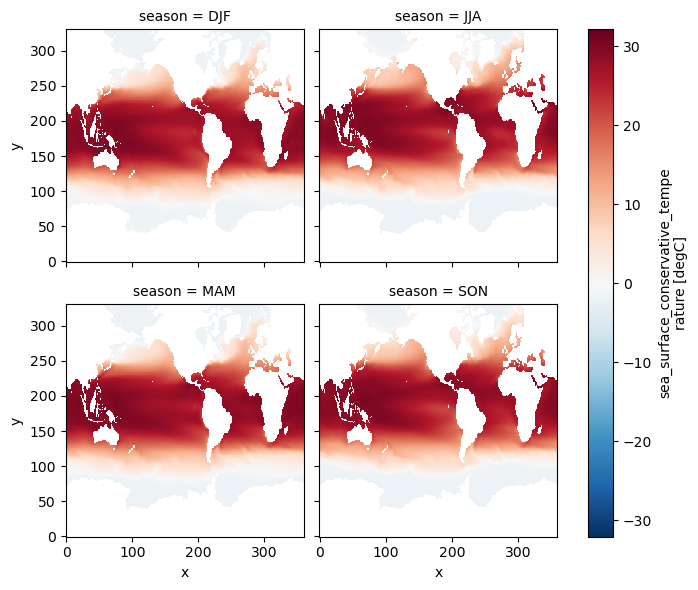

In [5]:
# -- Plot Seasonal Climatology of SST -- #
ds.tos_con.groupby("time_counter.season").mean().plot(col="season", col_wrap=2)